In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from matplotlib_venn import venn2 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

### Comparison MS data v1

In [ ]:
dataset1 = "deybis_05" # "deybis_05", "vanessa_05", "mentos_05", "Douban Online_Offline", "ACM_DBLP" # args.dataset
dataset2 = "vanessa_05" # "deybis_05", "vanessa_05", "mentos_05", "Douban Online_Offline", "ACM_DBLP" # args.dataset

encoder = "GIN"

In [ ]:
list_train_set = [
	["FrescoAmazonas_1", "FrescoAmazonas_2"],
	["FrescoCusco_1", "FrescoCusco_2"],
	["FrescoSanMartin_1", "FrescoSanMartin_2"],
	["SecoAmazonas_1", "SecoAmazonas_2"],
	["SecoCusco_1", "SecoCusco_2"],
	["SecoSanMartin_1", "SecoSanMartin_2"]
]

In [ ]:
tol_rt, tol_mz = 0.5, 15 # 0.5 min, 10 ppm

for train_set in list_train_set:
	df_1 = pd.read_csv(f"data/{dataset1}/output/node_alignment_{encoder}_{dataset1}_{train_set}.csv" , sep=";", decimal=",")
	df_2 = pd.read_csv(f"data/{dataset2}/output/node_alignment_{encoder}_{dataset2}_{train_set}.csv" , sep=";", decimal=",")

	df_match = (
		df_1.assign(key=1)
			.merge(df_2.assign(key=1), on="key", suffixes=("_1", "_2"))
			.drop(columns="key")
	)

	df_match["mz_error"] = (
		(df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs() /
		((df_match["Average Mz_1"] + df_match["Average Mz_2"]) / 2)
	) * 1e6

	df_match["rt_error"] = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
	df_match

	df_match_filter = df_match[df_match["mz_error"] < tol_mz]
	# df_match_filter = df_match[(df_match["mz_error"] < tol_mz) & (df_match["rt_error"] < tol_rt)]
	
	print(train_set)
	display(df_match_filter)

In [ ]:
tol_rt, tol_mz = 0.5, 15 # 0.5 min, 10 ppm

df_1 = pd.read_csv(f"data/{dataset1}/raw.csv", index_col=0).iloc[:, :3] # Sep
df_2 = pd.read_csv(f"data/{dataset2}/raw.csv", index_col=0).iloc[:, :3] # Dec
print(len(df_1), len(df_2))

df_match = (
	df_1.assign(key=1)
		.merge(df_2.assign(key=1), on="key", suffixes=("_1", "_2"))
		.drop(columns="key")
)

df_match["mz_error"] = (
	(df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs() /
	((df_match["Average Mz_1"] + df_match["Average Mz_2"]) / 2)
) * 1e6

df_match["rt_error"] = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
df_match

In [ ]:
df_match_filter = df_match[df_match["mz_error"] < tol_mz]
df_match_filter

In [ ]:
df_match_filter = df_match[(df_match["mz_error"] < tol_mz) & (df_match["rt_error"] < tol_rt)]
df_match_filter

In [ ]:
""" rt_diff = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
mz_diff = (
	((df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs() / (df_match["Average Mz_1"] + df_match["Average Mz_2"]) / 2)
) * 1e6
mask = (rt_diff <= tol_rt) & (mz_diff <= tol_mz)
# mask = (mz_diff <= tol_mz)

df_intersection = df_match.loc[mask].reset_index(drop=True)
df_intersection """

In [ ]:
""" tol_rt, tol_mz = 0.5, 0.01 # Change

for train_set in list_train_set:
	df_1 = pd.read_csv(f"data/{dataset1}/output/node_alignment_{encoder}_{dataset1}_{train_set}.csv" , sep=";", decimal=",")
	df_2 = pd.read_csv(f"data/{dataset2}/output/node_alignment_{encoder}_{dataset2}_{train_set}.csv" , sep=";", decimal=",")

	df_match = (
		df_1.assign(key=1)
			.merge(df_2.assign(key=1), on="key", suffixes=("_1", "_2"))
			.drop(columns="key")
	)

	rt_diff = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
	mz_diff = (
		(df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs() # / df_match["Average Mz_2"] * 1e6
	)
	# mask = (rt_diff <= tol_rt) & (mz_diff <= tol_mz)
	mask = (mz_diff <= tol_mz)

	df_intersection = df_match.loc[mask].reset_index(drop=True)
	print(train_set)
	display(df_intersection) """

### Comparison filter Deybis

In [ ]:
dataset1 = "deybis_filter_september_2br_10ar" # "deybis_filter_september_05", "deybis_filter_december_05", "deybis_05", "vanessa_05", "mentos_05", "Douban Online_Offline", "ACM_DBLP" # args.dataset
dataset2 = "deybis_filter_december_2br_10ar" # "deybis_filter_september_05", "deybis_filter_december_05",

# Parameters data
file = open(f"data/{dataset1}/input/parameters.json")
params = json.load(file)

methods = params["methods"]
print("Methods:\t", methods)

data_variations = params["data_variations"]
print("Data variations:", data_variations)

has_transformation = params["has_transformation"]
print("Has transformation:", has_transformation)

dimension = params["dimension"]
print("Dimension:\t", dimension)

threshold_corr = params["threshold_corr"]
print("Threshold corr:\t", threshold_corr)

iterations = params["iterations"]
print("Iterations:\t", iterations)

groups_id = params["groups_id"]
print("Groups id:\t", groups_id)

subgroups_id = params["subgroups_id"]
print("Subgroups id:\t", subgroups_id)

groups_id_no = params["groups_id_no"]
print("Groups id (no):\t", groups_id_no)

seeds = params["seeds"]
print("Seeds:\t\t", seeds)

sensitivity = params["sensitivity"]
print("Sensitivity:\t", sensitivity)

In [ ]:
# Read raw data

df_join_raw = pd.read_csv("data/{}/input/raw.csv".format(dataset1), index_col=0)
df_join_raw

In [ ]:
# Filter

list_node_intersection = []
for group_id in groups_id:
	print(group_id)

	# Read common node
	common_node_id1 = sorted(np.load(f"data/{dataset1}/output/common_node/{group_id}.npy"))
	common_node_id2 = sorted(np.load(f"data/{dataset2}/output/common_node/{group_id}.npy"))
	# print(common_node_id1)
	# print(common_node_id2)

	intersection = sorted(list(set(common_node_id1) & set(common_node_id2)))
	# print(intersection)
	
	list_node_intersection.append([group_id, intersection])
	# list_node_intersection.append([group_id, ",".join(map(str, intersection))])

	# Plot
	plt.figure()
	venn2(subsets=(len(common_node_id1), len(common_node_id2), len(intersection)), set_labels=("September", "December"))
	plt.show()

df_comparison = pd.DataFrame(list_node_intersection, columns=["Group id", "Common node id"])
df_comparison

In [ ]:
# Filter by gropu id

for i, group_id in enumerate(groups_id):
	print(group_id)
	common_node_id = list_node_intersection[i][1]
	print(len(common_node_id), common_node_id)

	# Filter raw data
	df_join_raw_filter = df_join_raw.loc[common_node_id].iloc[:, [0, 1, 2]]
	# df_join_raw_filter.to_csv(f"data/{dataset}/output/filter_raw/{group_id}.csv", sep=";", decimal=",", index_label="Id")
	display(df_join_raw_filter)

In [ ]:
# Comparison with Statistics

df_sta = pd.read_csv(f"data/deybis_filter_september_2br_3ar/input/sta.csv") # Prof. Alfredo
df_sta

In [ ]:
# Filter by gropu id (using intersection nodes)

tol_rt, tol_mz = 0.5, 0.01
for i, group_id in enumerate(groups_id):
	print(group_id)
	common_node_id = list_node_intersection[i][1]
	print(common_node_id)

	# Filter raw data
	df_join_raw_filter = df_join_raw.loc[common_node_id].iloc[:, [0, 1]]

	df_1 = df_sta.copy()
	df_2 = df_join_raw_filter.copy()
	print(len(df_1), len(df_2))

	df_match = (
		df_1.assign(key=1)
			.merge(df_2.assign(key=1), on="key", suffixes=("_1", "_2"))
			.drop(columns="key")
	)

	df_match["mz_error"] = (
		(df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs()
	)

	df_match["rt_error"] = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
	# df_match_filter = df_match[df_match["mz_error"] < tol_mz]
	df_match_filter = df_match[(df_match["mz_error"] < tol_mz) & (df_match["rt_error"] < tol_rt)]
	display(df_match_filter)

In [ ]:
# Filter by gropu id (using common nodes)

dataset = dataset2 # Change, dataset1, dataset2
tol_rt, tol_mz = 0.5, 0.01
print(dataset)

for i, group_id in enumerate(groups_id):
	print(group_id)
	common_node_id = sorted(np.load(f"data/{dataset}/output/common_node/{group_id}.npy"))
	print(common_node_id)

	# Filter raw data
	df_join_raw_filter = df_join_raw.loc[common_node_id].iloc[:, [0, 1]]

	df_1 = df_sta.copy()
	df_2 = df_join_raw_filter.copy()
	print(len(df_1), len(df_2))

	df_match = (
		df_1.assign(key=1)
			.merge(df_2.assign(key=1), on="key", suffixes=("_1", "_2"))
			.drop(columns="key")
	)

	df_match["mz_error"] = (
		(df_match["Average Mz_1"] - df_match["Average Mz_2"]).abs()
	)

	df_match["rt_error"] = (df_match["Average Rt_1"] - df_match["Average Rt_2"]).abs()
	# df_match_filter = df_match[df_match["mz_error"] < tol_mz]
	df_match_filter = df_match[(df_match["mz_error"] < tol_mz) & (df_match["rt_error"] < tol_rt)]
	display(df_match_filter)

### Classification

In [2]:
# file = open("exp.json")
# experiment = json.load(file)
exp = "exp1" # experiment["exp"] # Change to static

file = open("experiments/output/{}/parameters.json".format(exp))
params = json.load(file)

print("Exp:\t\t", exp)

raw_data_file = params["raw_data_file"]
print("Raw data:\t", raw_data_file)

methods = params["methods"]
print("Methods:\t", methods)

has_transformation = params["has_transformation"]
print("Has transformation:", has_transformation)

dimension = params["dimension"]
print("Dimension:\t", dimension)

groups_id = params["groups_id"]
print("Groups id:\t", groups_id)

subgroups_id = params["subgroups_id"]
print("Subgroups id:\t", subgroups_id)

cuda = params["cuda"]
print("Cuda:\t", cuda)

Exp:		 exp1
Raw data:	 deybis_filter_september_2br_3ar_format
Methods:	 ['t-gae']
Has transformation: False
Dimension:	 32
Groups id:	 ['SecoAmazonas', 'FrescoSanMartin', 'FrescoCusco', 'FrescoAmazonas', 'SecoSanMartin', 'SecoCusco']
Subgroups id:	 {'SecoAmazonas': ['1', '2'], 'FrescoSanMartin': ['1', '2'], 'FrescoCusco': ['1', '2'], 'FrescoAmazonas': ['1', '2'], 'SecoSanMartin': ['1', '2'], 'SecoCusco': ['1', '2']}
Cuda:	 1


In [3]:
# df_join_raw = pd.read_csv(f"experiments/input/{exp}_raw.csv", index_col=0)
df_raw = pd.read_csv(f"experiments/raw_data/deybis_filter_september_all_format.csv", delimiter="|")
df_raw

,Alignment ID,Average Rt,Average Mz,Metabolite name,SecoAmazonas_1.1,SecoAmazonas_1.2,SecoAmazonas_1.3,SecoAmazonas_1.4,SecoAmazonas_1.5,SecoAmazonas_1.6,...,FrescoAmazonas_3.1,FrescoAmazonas_3.2,FrescoAmazonas_3.3,FrescoAmazonas_3.4,FrescoAmazonas_3.5,FrescoAmazonas_3.6,FrescoAmazonas_3.7,FrescoAmazonas_3.8,FrescoAmazonas_3.9,FrescoAmazonas_3.10
0,0,1.754,167.01318,NaN,2.102369e+07,5.191424e+06,2.297892e+06,2.022352e+06,1.922735e+06,1.522363e+06,...,2.691737e+07,2.667536e+07,3.425704e+06,3.852726e+06,4.906125e+06,4.632700e+06,6.474274e+06,5.309377e+06,1.222893e+07,1.096223e+07
1,1,2.120,152.05702,NaN,2.420068e+06,2.307995e+06,5.114995e+06,5.131455e+06,5.336355e+06,5.418774e+06,...,7.975709e+05,8.330269e+05,1.464225e+06,1.471219e+06,1.590734e+06,1.752319e+06,1.199727e+06,1.253488e+06,1.451674e+06,1.511296e+06
2,2,2.125,257.96816,NaN,9.001219e+06,9.873734e+06,7.146516e+05,6.834720e+05,7.314678e+06,7.242087e+06,...,1.464372e+07,1.561670e+07,1.069788e+06,1.134695e+06,1.007142e+07,9.805008e+06,1.503011e+07,1.535597e+07,1.626041e+07,1.720745e+07
3,3,2.128,207.98572,NaN,1.938034e+07,2.008965e+07,2.191925e+06,2.174522e+06,5.848345e+06,5.715126e+06,...,2.772725e+07,2.676637e+07,2.053523e+06,2.105461e+06,8.143728e+06,7.678579e+06,1.483699e+07,1.450835e+07,1.945829e+07,1.910929e+07
4,4,2.133,217.96001,NaN,9.418357e+06,9.172249e+06,1.434368e+07,1.480194e+07,1.936935e+07,1.923575e+07,...,1.372708e+07,1.383002e+07,2.095277e+07,2.200807e+07,2.830071e+07,2.649514e+07,2.400543e+07,2.153438e+07,2.538244e+07,2.781277e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,20.487,501.26053,NaN,5.709668e+06,5.691558e+06,4.908186e+06,5.048013e+06,5.715906e+06,5.190272e+06,...,7.366804e+06,6.834722e+06,6.712807e+06,6.186079e+06,7.730475e+06,7.233852e+06,7.394969e+06,6.816898e+06,7.023647e+06,7.784816e+06
158,158,22.679,520.34109,NaN,1.034447e+07,1.153674e+07,3.173041e+07,2.880942e+07,2.625058e+07,2.696883e+07,...,2.220213e+05,1.821823e+05,9.847894e+05,8.646981e+05,7.707464e+05,7.362852e+05,5.459844e+05,5.837284e+05,6.648591e+05,6.099219e+05
159,159,23.180,200.20136,NaN,7.190209e+06,6.419463e+06,1.939271e+07,2.036405e+07,2.358837e+07,2.184794e+07,...,9.140713e+06,9.683758e+06,3.105293e+07,2.459284e+07,3.208167e+07,3.071925e+07,3.133476e+07,3.285109e+07,4.688143e+07,4.851697e+07
160,160,24.234,496.34082,NaN,2.836296e+07,2.610888e+07,5.500906e+07,5.810079e+07,3.126886e+07,3.067800e+07,...,3.224507e+07,2.965402e+07,4.949670e+07,4.681355e+07,2.604815e+07,2.548679e+07,1.401562e+07,1.510820e+07,1.913652e+07,1.905453e+07


In [4]:
# Concat
df_join_raw = pd.concat([df_raw.iloc[:, :]], axis=1)
df_join_raw.set_index("Alignment ID", inplace=True)
df_join_raw = df_join_raw.rename_axis(None)
df_join_raw

,Average Rt,Average Mz,Metabolite name,SecoAmazonas_1.1,SecoAmazonas_1.2,SecoAmazonas_1.3,SecoAmazonas_1.4,SecoAmazonas_1.5,SecoAmazonas_1.6,SecoAmazonas_1.7,...,FrescoAmazonas_3.1,FrescoAmazonas_3.2,FrescoAmazonas_3.3,FrescoAmazonas_3.4,FrescoAmazonas_3.5,FrescoAmazonas_3.6,FrescoAmazonas_3.7,FrescoAmazonas_3.8,FrescoAmazonas_3.9,FrescoAmazonas_3.10
0,1.754,167.01318,NaN,2.102369e+07,5.191424e+06,2.297892e+06,2.022352e+06,1.922735e+06,1.522363e+06,2.475798e+06,...,2.691737e+07,2.667536e+07,3.425704e+06,3.852726e+06,4.906125e+06,4.632700e+06,6.474274e+06,5.309377e+06,1.222893e+07,1.096223e+07
1,2.120,152.05702,NaN,2.420068e+06,2.307995e+06,5.114995e+06,5.131455e+06,5.336355e+06,5.418774e+06,3.795608e+06,...,7.975709e+05,8.330269e+05,1.464225e+06,1.471219e+06,1.590734e+06,1.752319e+06,1.199727e+06,1.253488e+06,1.451674e+06,1.511296e+06
2,2.125,257.96816,NaN,9.001219e+06,9.873734e+06,7.146516e+05,6.834720e+05,7.314678e+06,7.242087e+06,1.013907e+07,...,1.464372e+07,1.561670e+07,1.069788e+06,1.134695e+06,1.007142e+07,9.805008e+06,1.503011e+07,1.535597e+07,1.626041e+07,1.720745e+07
3,2.128,207.98572,NaN,1.938034e+07,2.008965e+07,2.191925e+06,2.174522e+06,5.848345e+06,5.715126e+06,1.004516e+07,...,2.772725e+07,2.676637e+07,2.053523e+06,2.105461e+06,8.143728e+06,7.678579e+06,1.483699e+07,1.450835e+07,1.945829e+07,1.910929e+07
4,2.133,217.96001,NaN,9.418357e+06,9.172249e+06,1.434368e+07,1.480194e+07,1.936935e+07,1.923575e+07,1.545732e+07,...,1.372708e+07,1.383002e+07,2.095277e+07,2.200807e+07,2.830071e+07,2.649514e+07,2.400543e+07,2.153438e+07,2.538244e+07,2.781277e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,20.487,501.26053,NaN,5.709668e+06,5.691558e+06,4.908186e+06,5.048013e+06,5.715906e+06,5.190272e+06,5.309914e+06,...,7.366804e+06,6.834722e+06,6.712807e+06,6.186079e+06,7.730475e+06,7.233852e+06,7.394969e+06,6.816898e+06,7.023647e+06,7.784816e+06
158,22.679,520.34109,NaN,1.034447e+07,1.153674e+07,3.173041e+07,2.880942e+07,2.625058e+07,2.696883e+07,2.167971e+07,...,2.220213e+05,1.821823e+05,9.847894e+05,8.646981e+05,7.707464e+05,7.362852e+05,5.459844e+05,5.837284e+05,6.648591e+05,6.099219e+05
159,23.180,200.20136,NaN,7.190209e+06,6.419463e+06,1.939271e+07,2.036405e+07,2.358837e+07,2.184794e+07,2.493698e+07,...,9.140713e+06,9.683758e+06,3.105293e+07,2.459284e+07,3.208167e+07,3.071925e+07,3.133476e+07,3.285109e+07,4.688143e+07,4.851697e+07
160,24.234,496.34082,NaN,2.836296e+07,2.610888e+07,5.500906e+07,5.810079e+07,3.126886e+07,3.067800e+07,2.151918e+07,...,3.224507e+07,2.965402e+07,4.949670e+07,4.681355e+07,2.604815e+07,2.548679e+07,1.401562e+07,1.510820e+07,1.913652e+07,1.905453e+07


In [5]:
# Classification

print(raw_data_file)
list_metrics = []
for group_id in groups_id + ["Intersection", "Union"]:
    try:
        # Read common node
        common_node_id = np.load(f"experiments/output/{exp}/common_nodes/{group_id}.npy")
        print(group_id, len(common_node_id))
        
        df_join_raw_signal = df_join_raw.loc[common_node_id].iloc[:, 3:]
        df_join_raw_signal_t = df_join_raw_signal.T
        # display(df_join_raw_signal_t)
        
        # Scaling
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_join_raw_signal_t.values)
        # print(X_scaled)
        
        # Target
        y = df_join_raw_signal_t.index
        y = [item.split("_")[0] for item in y]
        
        print(X_scaled.shape)
        
        # Split
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        # Select and train model
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)

        # Evaluation
        y_pred = rf_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        recall_macro = recall_score(y_test, y_pred, average="macro")
        f1_macro = f1_score(y_test, y_pred, average="macro")
        # classification_rep = classification_report(y_test, y_pred, output_dict=True)

        # Convert the dictionary to a pandas DataFrame and transpose it
        # df_report = pd.DataFrame(classification_rep).transpose()
        # display(df_report)
        list_metrics.append([group_id, len(common_node_id), accuracy, recall_macro, f1_macro])
    except TypeError as e:
        print(e)
    
df_metrics = pd.DataFrame(list_metrics,  columns=["Group id", "Num. common node", "Accuracy", "Recall", "F1-score"])
df_metrics

deybis_filter_september_2br_3ar_format
SecoAmazonas 81
(160, 81)
FrescoSanMartin 73
(160, 73)
FrescoCusco 110
(160, 110)
FrescoAmazonas 118
(160, 118)
SecoSanMartin 29
(160, 29)
SecoCusco 121
(160, 121)
Intersection 10
(160, 10)
Union 157
(160, 157)


,Group id,Num. common node,Accuracy,Recall,F1-score
0,SecoAmazonas,81,0.81250,0.828571,0.805199
1,FrescoSanMartin,73,0.78125,0.814286,0.810985
2,FrescoCusco,110,0.87500,0.895238,0.887270
3,FrescoAmazonas,118,0.71875,0.738095,0.691880
4,SecoSanMartin,29,0.53125,0.585714,0.522817
5,SecoCusco,121,0.87500,0.885714,0.873329
6,Intersection,10,0.53125,0.566667,0.494672
7,Union,157,0.93750,0.952381,0.951389


In [6]:
# Select best model (dataset and group id)

exp = "exp1" # Change
group_id = "FrescoCusco" # Change, Union, FrescoCusco

file = open("experiments/output/{}/parameters.json".format(exp))
params = json.load(file)

print("Exp:\t\t", exp)

raw_data_file = params["raw_data_file"]
print("Raw data:\t", raw_data_file)

# Read common node
common_node_id = np.load(f"experiments/output/{exp}/common_nodes/{group_id}.npy")
print(group_id, len(common_node_id))

df_join_raw_signal = df_join_raw.loc[common_node_id].iloc[:, 3:]
df_join_raw_signal_t = df_join_raw_signal.T
# display(df_join_raw_signal_t)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_join_raw_signal_t.values)
# print(X_scaled)

# Target
y = df_join_raw_signal_t.index
y = [item.split("_")[0] for item in y]

Exp:		 exp1
Raw data:	 deybis_filter_september_2br_3ar_format
FrescoCusco 110


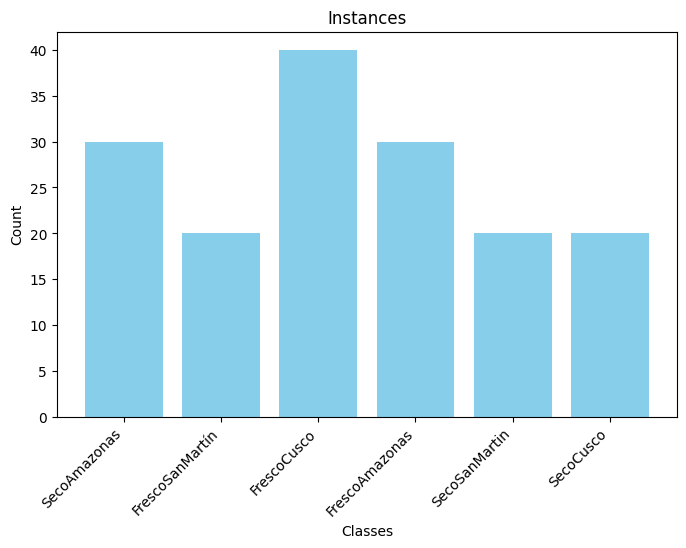

In [13]:
# Count the occurrences of each item

counts = Counter(y)

# Extract labels (items) and heights (counts) for the plot
labels = list(counts.keys())
values = list(counts.values())

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color="skyblue")

plt.xticks(labels, labels, rotation=45, ha="right")
# Add labels and title
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Instances")

# Display the plot
plt.show()


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Select and train model
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [50, 100, 200], # Número de árboles en el bosque
    "max_depth": [None, 10, 20, 30], # Máxima profundidad del árbol
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro", # Métrica a optimizar, por defecto 'accuracy' para clasificación
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best hyperparameters: {grid_search.best_params_}")

best_rf_model = grid_search.best_estimator_

# Evaluation
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall_macro = recall_score(y_test, y_pred, average="macro")
f1_macro = f1_score(y_test, y_pred, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall_macro)
print("F1-score:", f1_macro)

Evaluation with December data

In [ ]:
# Evaluation with December data

# df_join_raw = pd.read_csv(f"experiments/input/{exp}_raw.csv", index_col=0)
df_raw_new = pd.read_csv(f"experiments/raw_data/deybis_filter_december_all_format.csv", delimiter="|")
df_raw_new

In [ ]:
# Concat
df_join_raw_new = pd.concat([df_raw_new.iloc[:, :]], axis=1)
df_join_raw_new.set_index("Alignment ID", inplace=True)
df_join_raw_new = df_join_raw_new.rename_axis(None)
df_join_raw_new

In [ ]:
df_join_raw_signal_new = df_join_raw_new.loc[common_node_id].iloc[:, 3:]
df_join_raw_signal_t_new = df_join_raw_signal_new.T
# display(df_join_raw_signal_t_)

# Scaling
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(df_join_raw_signal_t_new.values)
# print(X_scaled)

# Target
y_new = df_join_raw_signal_t_new.index
y_new = [item.split("_")[0] for item in y_new]

In [ ]:
print(X_scaled_new.shape)
X_scaled_new

In [ ]:
print(len(y_new))
y_new

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, y_new, test_size=0.1, random_state=42)
print(len(y_train_new))
y_train_new

In [ ]:
y_pred_new = best_rf_model.predict(X_train_new)
print(len(y_pred_new))
y_pred_new.tolist()

In [ ]:
accuracy = accuracy_score(y_train_new, y_pred_new)
recall_macro = recall_score(y_train_new, y_pred_new, average="macro")
f1_macro = f1_score(y_train_new, y_pred_new, average="macro")

print("Accuracy:", accuracy)
print("Recall:", recall_macro)
print("F1-score:", f1_macro)

In [ ]:
df_comp = pd.DataFrame({
    "y true": y_train_new,
    "y pred": y_pred_new
})
df_comp.head(50)